# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key



### Generate the Cities List by Using the `citipy` Library

In [14]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
       
                    
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [22]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Data Retrieval     ")
print("------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Record %s of Set %s | %s" % (record_count, set_count, city))
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
      
    
                 
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"] ["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Data Retrieval     
------------------
Record 1 of Set 1 | zhangye
Record 2 of Set 1 | kapa'a
Record 3 of Set 1 | papatowai
Record 4 of Set 1 | east london
Record 5 of Set 1 | port-aux-francais
Record 6 of Set 1 | waitangi
Record 7 of Set 1 | gamay
Record 8 of Set 1 | puerto ayora
Record 9 of Set 1 | whangarei
Record 10 of Set 1 | grytviken
Record 11 of Set 1 | vernon
Record 12 of Set 1 | albany
Record 13 of Set 1 | ancud
Record 14 of Set 1 | invercargill
Record 15 of Set 1 | camana
Record 16 of Set 1 | nogliki
Record 17 of Set 1 | iqaluit
Record 18 of Set 1 | hermanus
Record 19 of Set 1 | hamilton
Record 20 of Set 1 | ola
Record 21 of Set 1 | uturoa
Record 22 of Set 1 | ahau
City not found. Skipping...
Record 23 of Set 1 | gebeit
Record 24 of Set 1 | callao
Record 25 of Set 1 | wailua homesteads
Record 26 of Set 1 | iskateley
Record 27 of Set 1 | manismata
Record 28 of Set 1 | vingt cinq
City not found. Skipping...
Record 29 of Set 1 | fuvahmulah
City not found. Skipping...
Record 30 

Record 4 of Set 6 | berberati
Record 5 of Set 6 | centenario
Record 6 of Set 6 | enewetak
Record 7 of Set 6 | naryn
Record 8 of Set 6 | xam nua
Record 9 of Set 6 | nemuro
Record 10 of Set 6 | macau
Record 11 of Set 6 | pacific grove
Record 12 of Set 6 | sitka
Record 13 of Set 6 | kirensk
Record 14 of Set 6 | da lat
Record 15 of Set 6 | veraval
Record 16 of Set 6 | queenstown
Record 17 of Set 6 | brokopondo
Record 18 of Set 6 | turgen
Record 19 of Set 6 | coyhaique
Record 20 of Set 6 | oppdal
Record 21 of Set 6 | san jose del guaviare
Record 22 of Set 6 | coahuayana de hidalgo
Record 23 of Set 6 | paragominas
Record 24 of Set 6 | villa gesell
Record 25 of Set 6 | lamu
Record 26 of Set 6 | cidade velha
Record 27 of Set 6 | touros
Record 28 of Set 6 | taroa
Record 29 of Set 6 | karratha
Record 30 of Set 6 | melfort
Record 31 of Set 6 | la ronge
Record 32 of Set 6 | greymouth
Record 33 of Set 6 | mili
Record 34 of Set 6 | gokwe
Record 35 of Set 6 | viedma
Record 36 of Set 6 | ghanzi
Record

Record 18 of Set 11 | naranjo
Record 19 of Set 11 | champerico
Record 20 of Set 11 | shakawe
Record 21 of Set 11 | hyesan
Record 22 of Set 11 | gweru
Record 23 of Set 11 | fallon
Record 24 of Set 11 | kaga bandoro
Record 25 of Set 11 | saint-pierre
Record 26 of Set 11 | ofunato
Record 27 of Set 11 | barcelos
Record 28 of Set 11 | dryden
Record 29 of Set 11 | luang prabang
Record 30 of Set 11 | uaboe
City not found. Skipping...
Record 31 of Set 11 | aykhal
Record 32 of Set 11 | kingston
Record 33 of Set 11 | qui nhon
Record 34 of Set 11 | huarmey
Record 35 of Set 11 | geiro
Record 36 of Set 11 | deir ez-zor
Record 37 of Set 11 | arti
Record 38 of Set 11 | oriximina
Record 39 of Set 11 | savannakhet
Record 40 of Set 11 | paita
Record 41 of Set 11 | kyosai
Record 42 of Set 11 | revda
Record 43 of Set 11 | aleg
Record 44 of Set 11 | quang ngai
Record 45 of Set 11 | mukah
City not found. Skipping...
Record 46 of Set 11 | talca
Record 47 of Set 11 | vangaindrano
Record 48 of Set 11 | sydney


In [23]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhangye,38.9342,100.4517,17.55,37,82,2.00,CN,1694377255
1,kapa'a,22.0752,-159.3190,28.99,71,20,6.69,US,1694377226
2,papatowai,-46.5619,169.4708,8.90,80,71,3.79,NZ,1694377256
3,east london,-33.0153,27.9116,18.72,78,90,1.78,ZA,1694377256
4,port-aux-francais,-49.3500,70.2167,2.68,70,52,13.47,TF,1694377256


In [25]:
# Read saved data
city_file = "../output_data/cities.csv"

city_data_df = pd.read_csv(city_file)

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

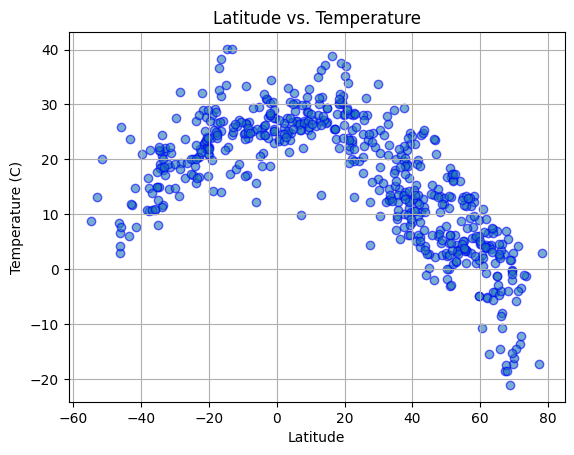

In [32]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="blue",
    linewidths=1,
    marker="o", 
    alpha=0.6,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("Latitude vs. Temperature")           
plt.label=("City Latitude vs. Temperature(2022-10-18)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

#### Latitude Vs. Humidity

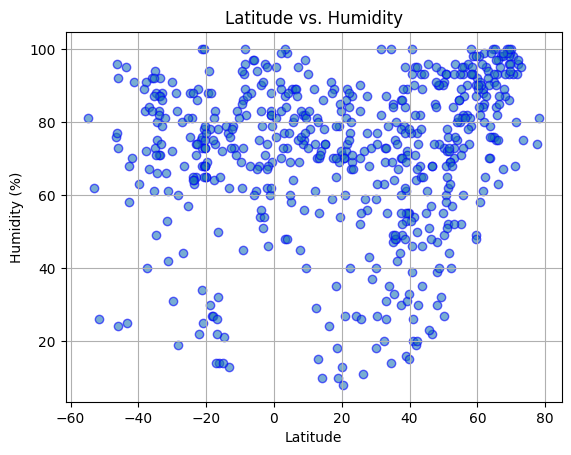

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="blue",
    linewidths=1,
    marker="o", 
    alpha=0.6,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("Latitude vs. Humidity")           
plt.label=("City Latitude vs. Humidity ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

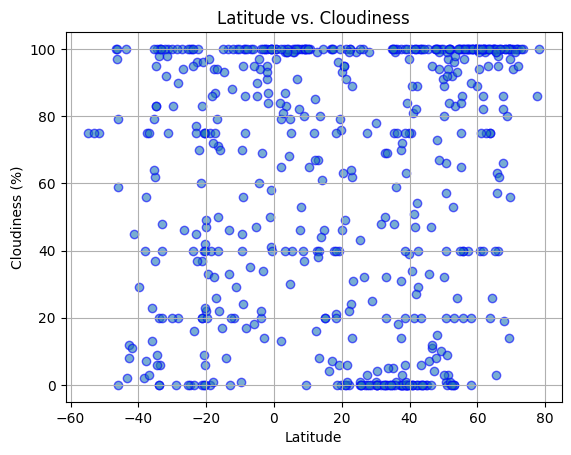

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="blue",
    linewidths=1,
    marker="o", 
    alpha=0.6,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("Latitude vs. Cloudiness")           
plt.label=("City Latitude vs. Cloudiness (%s)"% time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True
        )
# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

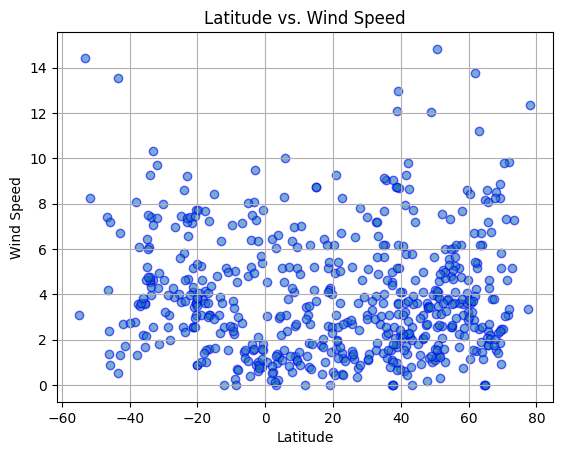

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="blue", 
    linewidths=1, 
    marker="o", 
    alpha=0.6,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE

plt.title("Latitude vs. Wind Speed")           
plt.label=("City Latitude vs. Wind Speed)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [50]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


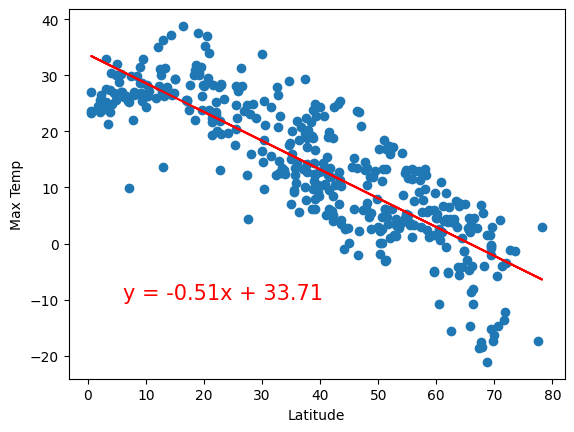

In [51]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

The r-value is: 0.4121057168607245


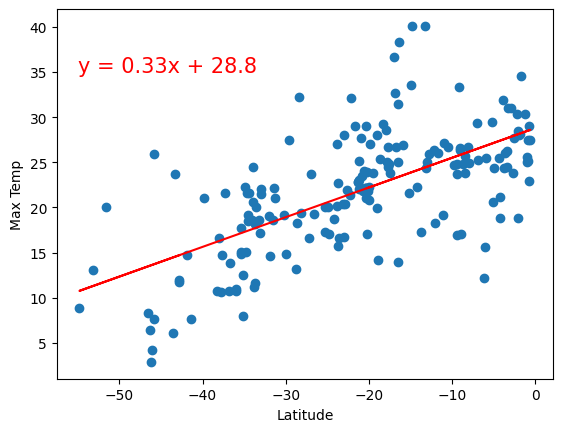

In [52]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

  Discussion about the linear relationship:

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789599


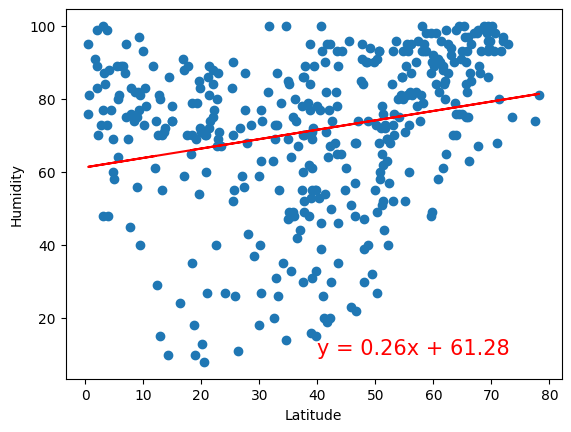

In [53]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (40, 10))

The r-value is: 0.0002808747046324616


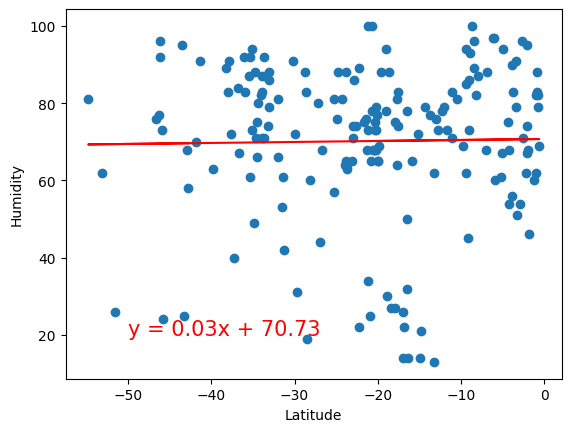

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811008


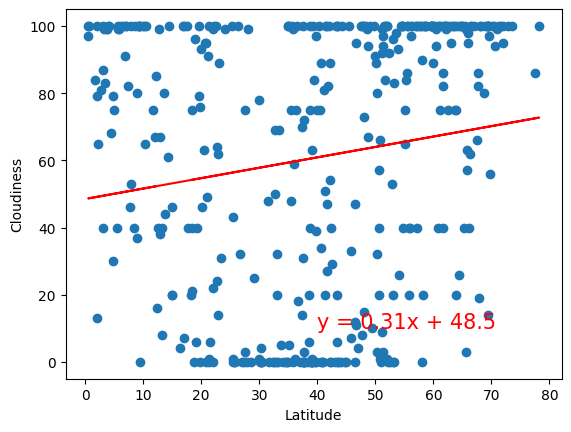

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40, 10))

The r-value is: 0.020567354299943663


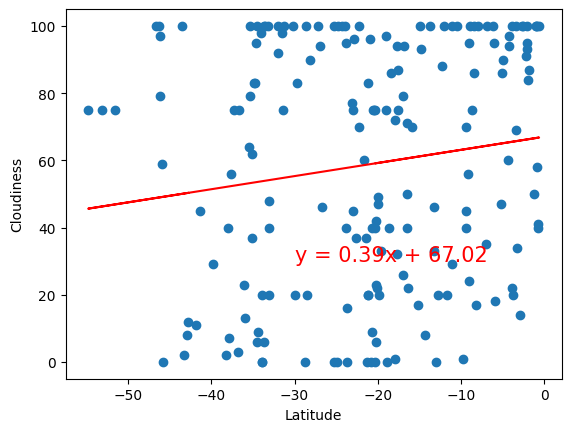

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30, 30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449474


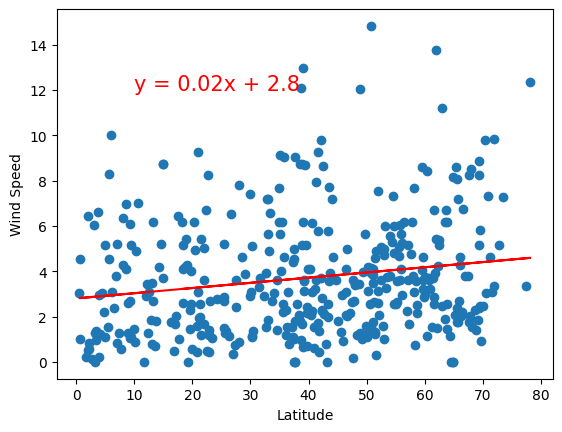

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10, 12))

The r-value is: 0.06223904070051575


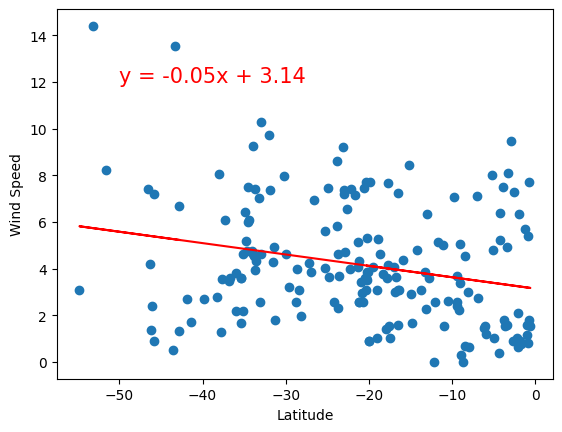

In [59]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE